# DECISION TREE

### Tasks:


#### 1. Data Preparation:


Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).

#### 2. Exploratory Data Analysis (EDA):

Perform exploratory data analysis to understand the structure of the dataset.

Check for missing values, outliers, and inconsistencies in the data.

Visualize the distribution of features, including histograms, box plots, and correlation matrices.

#### 3. Feature Engineering:

If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.

#### 4. Decision Tree Classification:


Split the dataset into training and testing sets (e.g., using an 80-20 split).

Implement a Decision Tree Classification model using a library like scikit-learn.

Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).

#### 5. Hyperparameter Tuning:


Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Load the dataset
data = pd.read_excel('heart_disease.xlsx')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_excel('heart_disease.xlsx')

# Initial Exploration
print("Dataset Info:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())

# Check for Missing Values
print("\nMissing Values:")
print(data.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           12 non-null     object
 1   Age in years  12 non-null     object
dtypes: object(2)
memory usage: 324.0+ bytes
None

Summary Statistics:
           age                  Age in years
count       12                            12
unique      12                            12
top     Gender  Gender ; Male - 1, Female -0
freq         1                             1

Missing Values:
age             0
Age in years    0
dtype: int64


In [3]:
data.columns

Index(['age', 'Age in years'], dtype='object')

In [5]:
data.dtypes

age             object
Age in years    object
dtype: object

In [10]:
# Check for Outliers and Visualize Features
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns, 1):
    if data[column].dtype != 'object':  # Check if the column is numerical
        plt.subplot(3, 5, i)
        sns.boxplot(x='target', y=column, data=data)
plt.tight_layout()
plt.show()



<Figure size 1500x1000 with 0 Axes>

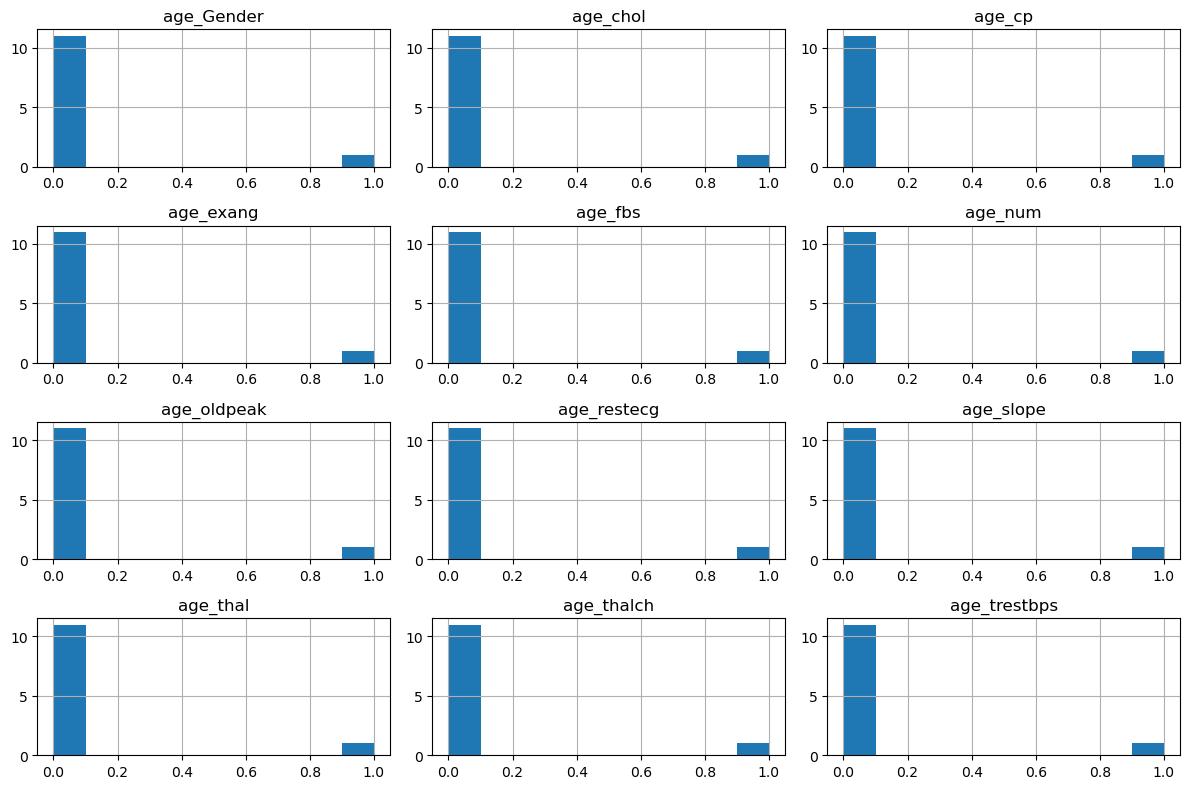

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
data.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()


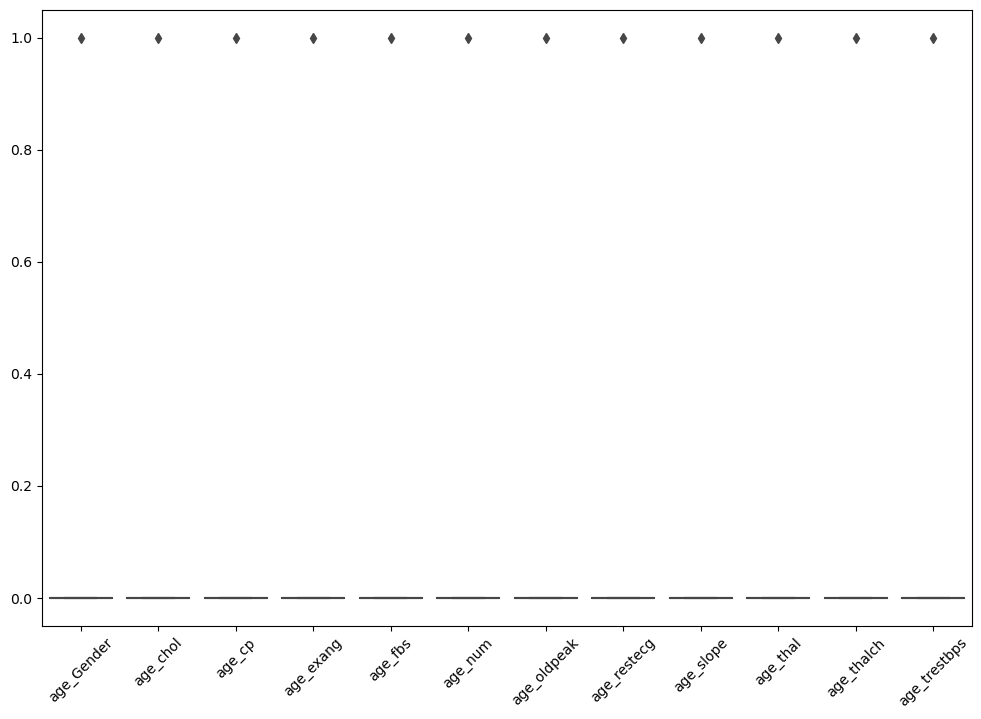

In [14]:

# Box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.show()


C:\Users\prana\AppData\Local\Temp\ipykernel_23992\1250815791.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


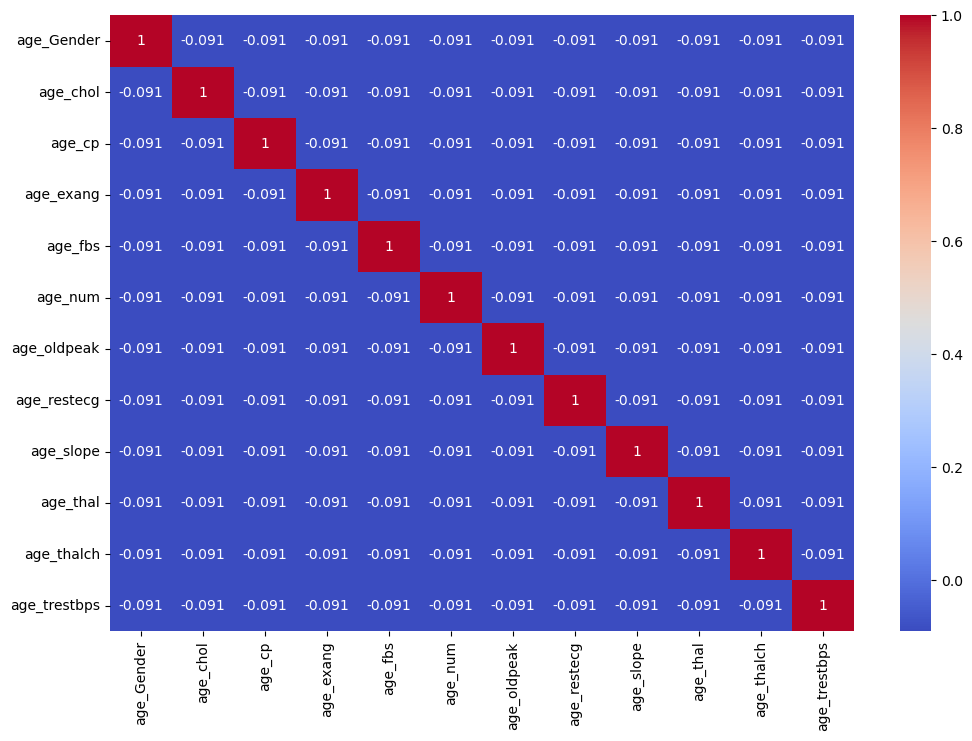

In [16]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


In [15]:
data.dtypes

age             object
Age in years    object
dtype: object

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load the dataset
df = pd.read_excel('heart_disease.xlsx')

# Split the dataset into features and target variable
X = df.drop(columns=['age'])
y = df['age']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)



In [ ]:
# Train the model on the training set
dt_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"ROC-AUC: {roc_auc}")


In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [34]:
# loading dataset
df = pd.read_excel('heart_disease.xlsx')
X = df.drop('age', axis=1)
y = df['age']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
param_grid = {
    'criterion': ['gini', 'entropy'],         
    'max_depth': [None, 10, 20, 30, 40, 50],  
    'min_samples_split': [2, 10, 20, 30, 40]  
}


In [36]:
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)


In [43]:
# Best parameters and best score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation accuracy: {best_score}")

# Evaluate on the test set
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)

# Performance metrics
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Test set accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)


AttributeError: 'GridSearchCV' object has no attribute 'best_params_'